In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pickle as pkl
from matplotlib.gridspec import GridSpec

font = {'family' : 'sans serif',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
config_suffix = 'all_patches'

In [3]:
with open('cache/' + config_suffix + '_estimation_info.pkl', 'rb') as file:
    estimation_info = pkl.load(file) # estimates are uncalibrated here!
    file.close()

with open('cache/' + config_suffix + '_estimates_matrix.pkl', 'rb') as file1:
    estiamtes_matrix_ts = pkl.load(file1)
    file.close()

with open('cache/' + config_suffix + '_oracle_results.pkl', 'rb') as file2:
    oracle_results = pkl.load(file2)
    file2.close()

true_dsc = pd.DataFrame(np.array([info_dict['true dice'] for info_dict in estimation_info]))
uncali_est = pd.DataFrame(np.array([info_dict['est dice'] for info_dict in estimation_info]))

oracle_true = pd.DataFrame(np.array([img_dict['true dsc curve'] for img_dict in oracle_results]))
oracle_est = pd.DataFrame(np.array([img_dict['est dsc curve'] for img_dict in oracle_results]))

In [4]:
oracle_error = oracle_est - oracle_true

In [5]:
x_jitter = np.random.uniform(-1, 1, oracle_error.shape[0])

Text(0.46, 0.84, 'c')

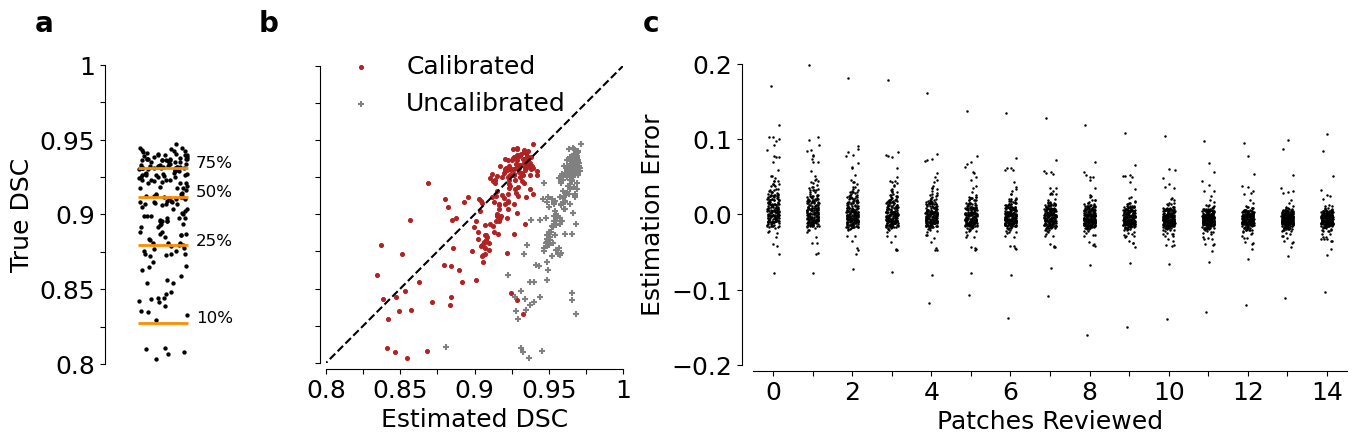

In [6]:
fig = plt.figure(figsize=(16, 5.3))
gs = GridSpec(1, 3, width_ratios=[0.3,1,2], wspace=0.4)

ax_post = fig.add_subplot(gs[0])
ax0 = fig.add_subplot(gs[1])
ax1 = fig.add_subplot(gs[2])
axes = [ax0, ax1, ax_post]

for ax in axes: 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('axes', -0.02))
    ax.spines['bottom'].set_position(('axes', -0.02))

axes[0].set_xlim(0.8, 1)
axes[0].set_ylim(0.8,1)
axes[0].set_aspect('equal')

axes[0].scatter(oracle_est.iloc[:, 0], true_dsc.iloc[:, 0], s=7, label='Calibrated', c='firebrick')
axes[0].scatter(uncali_est.iloc[:, 0], true_dsc.iloc[:, 0], s=19, c='grey', label='Uncalibrated', marker='+')
axes[0].legend(frameon=False, loc=(0, 0.8))
axes[0].set_xlabel('Estimated DSC')


axes[0].set_xticks([0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1],
                   ['0.8', '', '0.85', '', '0.9', '', '0.95', '', '1'])
axes[0].set_yticks([0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1],
                   ['' for i in range(9)])


# diagonal
axes[0].plot([0,1], [0,1], linestyle='--', c='black')

axes[1].set_xlabel('Patches Reviewed')
axes[1].set_ylabel('Estimation Error')
axes[1].set_xticks(np.arange(0,15), [str(k) if k%2 == 0 else '' for k in np.arange(0,15)])
axes[1].set_xlim(-0.5, 14.5)
axes[1].set_ylim(-0.2,0.2)

for i in range(oracle_error.shape[1]):
    axes[1].scatter(i + 0.15*x_jitter, oracle_error.iloc[:, i], s=0.6, c='black')

axes[1].set_aspect(19)

# first subplot
axes[2].scatter(0.03*x_jitter, true_dsc.iloc[:, 0], s=4.5, c='black')
axes[2].set_xlim(-0.07, 0.04)
axes[2].set_ylim(0.8, 1)
quantile_values = [0.1, 0.25, 0.5, 0.75]
quantile = np.quantile(true_dsc.iloc[:, 0], quantile_values)
quantile_label = [str(i) for i in quantile_values]
for q in quantile:
    axes[2].hlines(y=q, xmin=-0.031, xmax=0.031, color='darkorange', linewidth=2)

# add labels to quantile hlines
for q, p in zip(quantile, quantile_values):
    ax.text(0.04, q, str(int(p*100)) + '%', fontsize=12)    

axes[2].set_aspect(1.85)
axes[2].set_ylabel('True DSC')
#axes[2].spines['bottom'].set_visible(False)
axes[2].get_xaxis().set_visible(False)
axes[2].spines['bottom'].set_visible(False)

axes[2].set_yticks([0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1],
                   ['0.8', '', '0.85', '', '0.9', '', '0.95', '', '1'])

fig.text(0.08, 0.84, 'a', fontdict={'weight': 'bold', 'size': 20})
fig.text(0.22, 0.84, 'b', fontdict={'weight': 'bold', 'size': 20})
fig.text(0.46, 0.84, 'c', fontdict={'weight': 'bold', 'size': 20})

# fig.savefig('fig/estimation_accuracy.png', dpi=150, bbox_inches='tight')